In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Llamamos al dadaset que lo podemos encontrar en la carpeta del Drive de "FM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Dataset/dataset_barcelona_idealista_compra.csv""
result_barcelona = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/barcelona_api_junto.csv', sep = ";")

/tmp/ipykernel_12170/2587534321.py:2: DtypeWarning: Columns (45,76,77,78,79,80,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  result_barcelona = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/barcelona_api_junto.csv', sep = ";")


In [4]:
result_barcelona = result_barcelona[result_barcelona['municipality'].isin(['Barcelona', 'Badalona', 'Hospitalet de Llobregat',
       'Sant Adriá de Besós', 'Santa Coloma de Gramenet',
       'Esplugues de Llobregat', 'Sant Just Desvern', 'Sant Joan Despí'])]

In [6]:
result_barcelona.shape

(8918, 83)

In [ ]:
# Ve el número de viviendas por barrio
result_barcelona['neighborhood'].value_counts().reset_index()

,neighborhood,count
0,El Poble Sec - Parc de Montjuïc,352
1,La Dreta de l'Eixample,321
2,Vila de Gràcia,312
3,Pubilla Cases,311
4,Sant Andreu,291
...,...,...
90,El Bon Pastor,2
91,La Font de la Guatlla,2
92,Canyadó,1
93,Baró de Viver,1


In [ ]:
result_barcelona.drop_duplicates()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,price.priceDropInfo.formerPrice,price.priceDropInfo.priceDropValue,price.priceDropInfo.priceDropPercentage,isOnlineBookingActive,ribbons,labels,images,virtual3DTours,videos,homestagings
1871,105350715,https://img4.idealista.com/blur/WEB_LISTING-M/...,80714-80729-E,1,3,55000.00,flat,sale,60.00,True,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1872,98096792,https://img4.idealista.com/blur/WEB_LISTING-M/...,NaN,18,bj,220000.00,flat,sale,63.00,False,...,227000.00,7000.00,3.00,False,NaN,NaN,NaN,NaN,NaN,NaN
1873,98984306,https://img4.idealista.com/blur/WEB_LISTING-M/...,M-282-V,23,bj,220000.00,flat,sale,66.00,False,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1874,98941399,https://img4.idealista.com/blur/WEB_LISTING-M/...,PIS1052,22,bj,220000.00,flat,sale,63.00,False,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1875,100584105,https://img4.idealista.com/blur/WEB_LISTING-M/...,1107734,8,3,220000.00,flat,sale,70.00,True,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20089,105692295,https://img4.idealista.com/blur/WEB_LISTING-M/...,LCB31713,39,2,230000.00,flat,sale,108.00,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090,105929736,https://img4.idealista.com/blur/WEB_LISTING-M/...,102,43,bj,109000.00,flat,sale,30.00,True,...,114000.00,5000.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20091,105027109,https://img4.idealista.com/blur/WEB_LISTING-M/...,LCB30213,67,12,289900.00,flat,sale,114.00,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20092,105481874,https://img4.idealista.com/blur/WEB_LISTING-M/...,SP897,39,1,449000.00,flat,sale,101.00,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


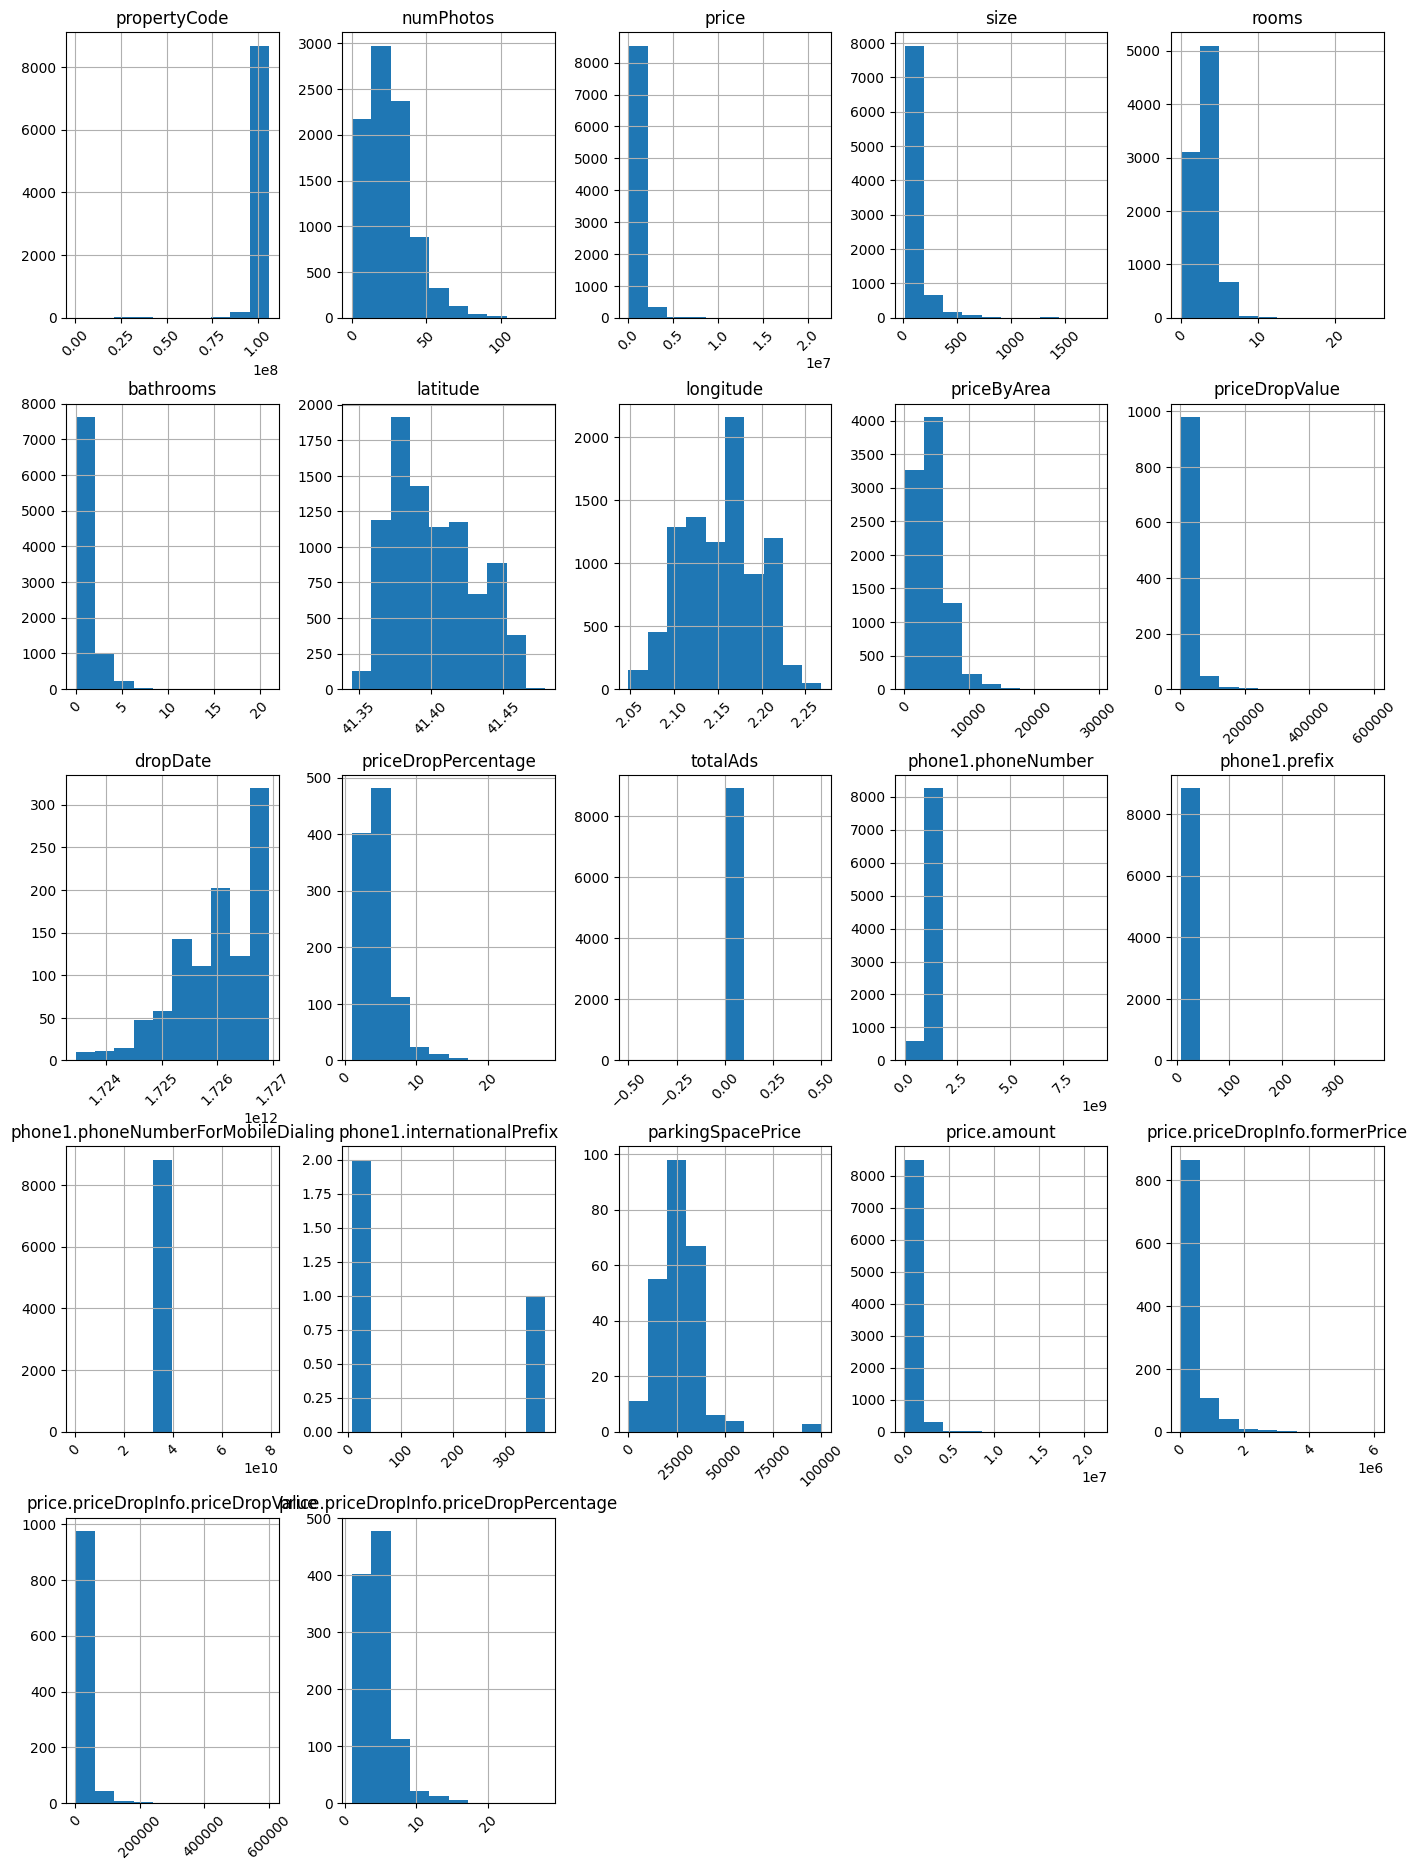

In [ ]:
# Crea un histograma para cada columna, exploración de datos

result_barcelona.hist(figsize=(17,23), xrot=45)
plt.show()

In [ ]:
result_barcelona.select_dtypes(include = "object").describe().transpose().to_csv("valores_frecuentes_columnas.csv", sep = ";")

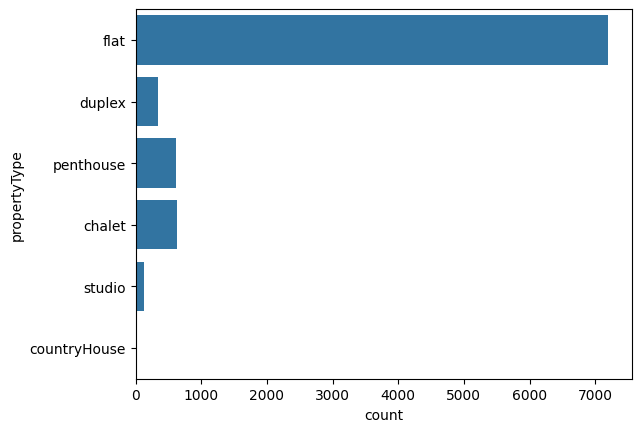

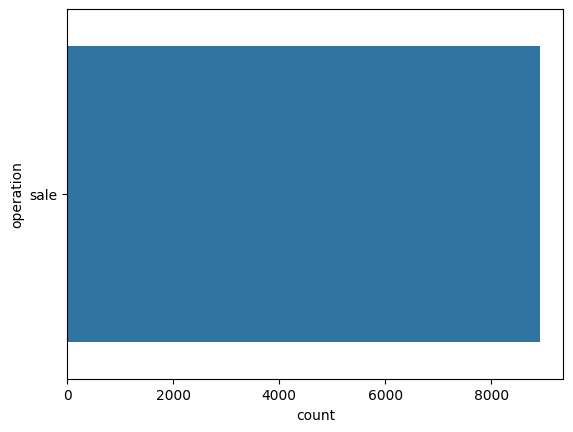

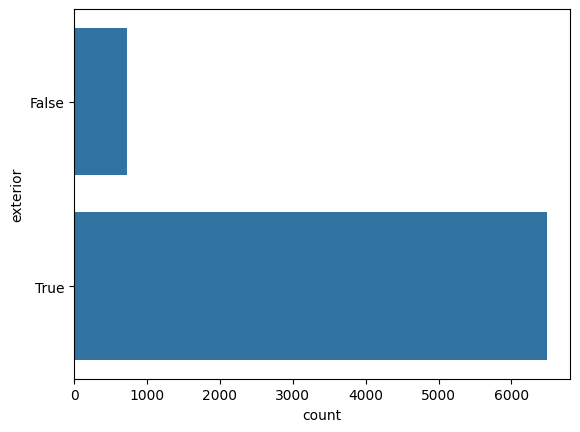

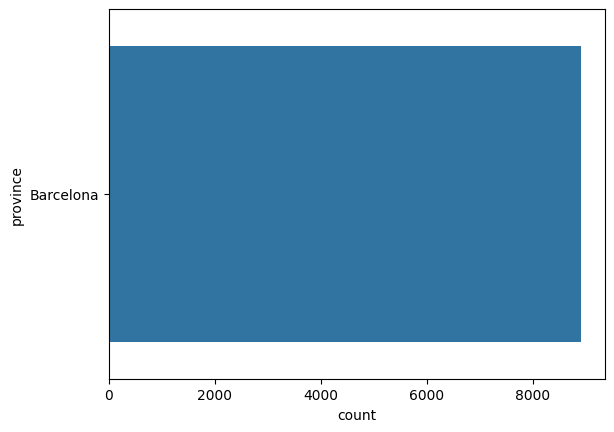

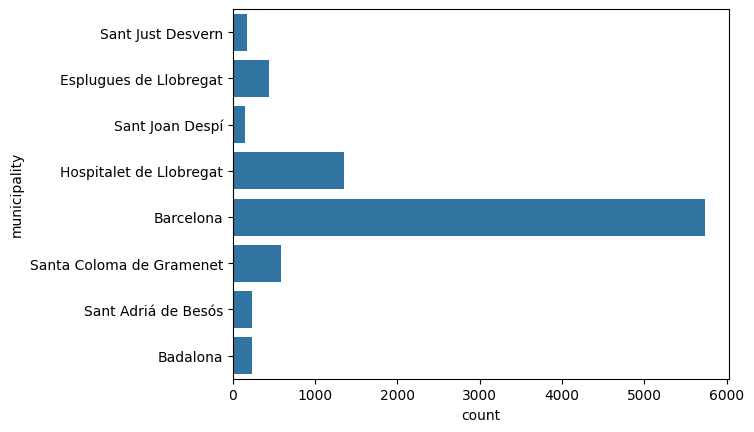

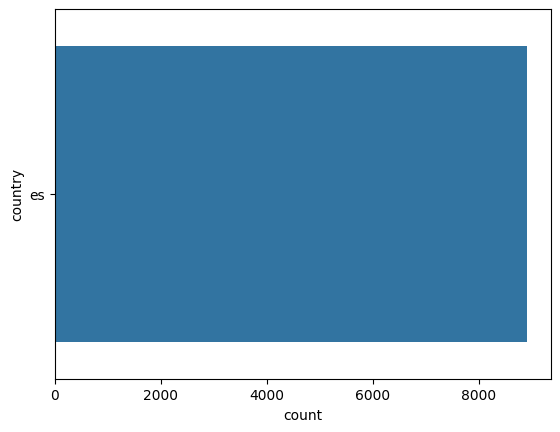

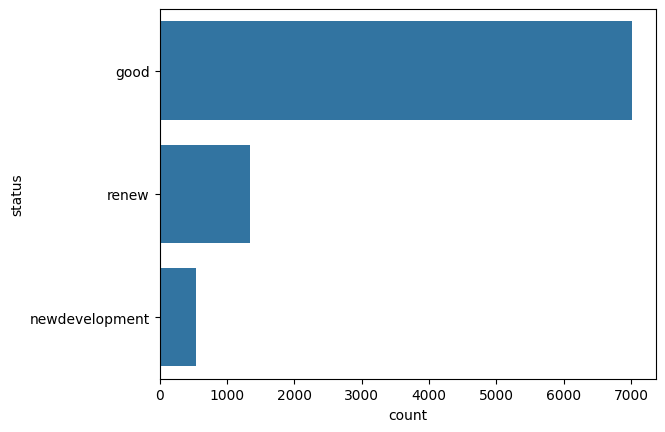

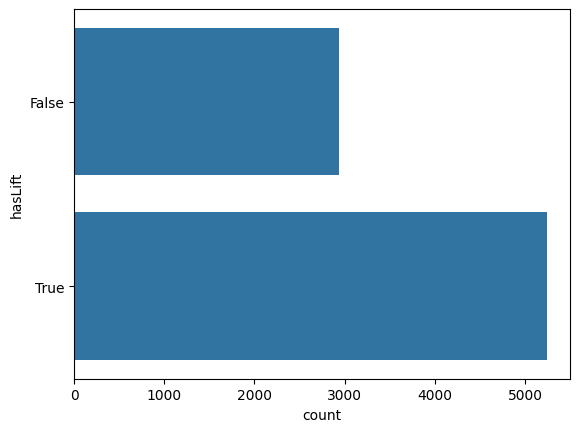

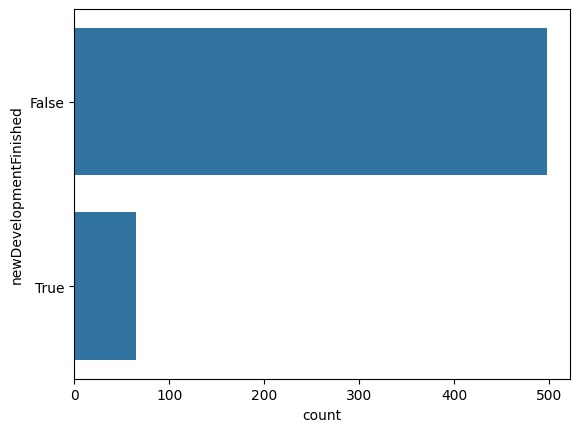

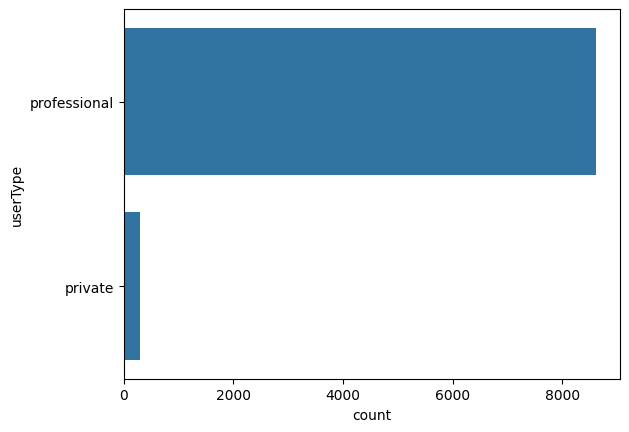

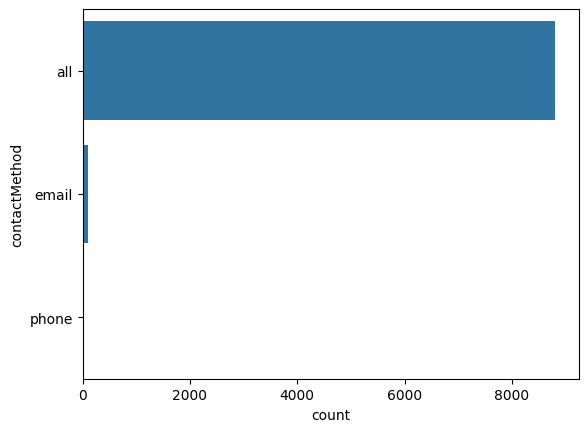

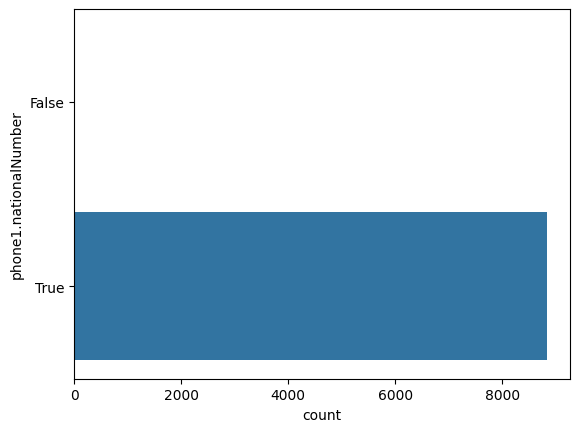

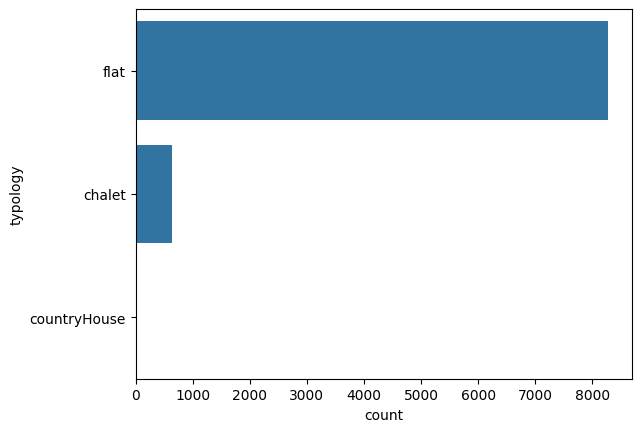

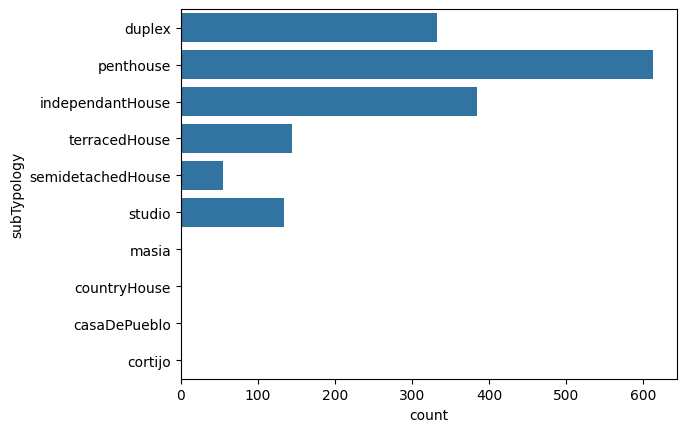

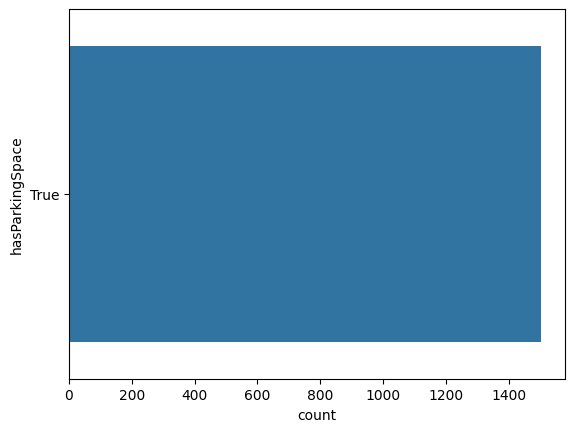

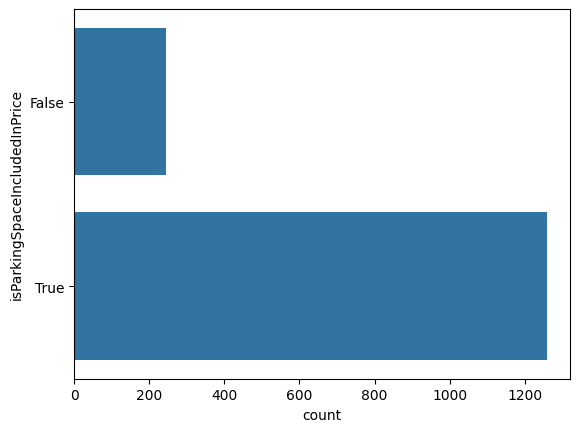

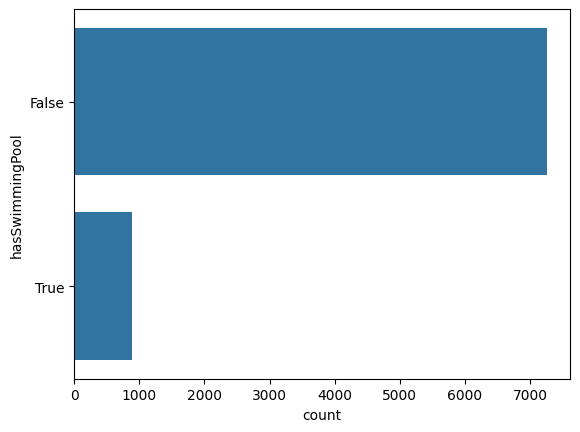

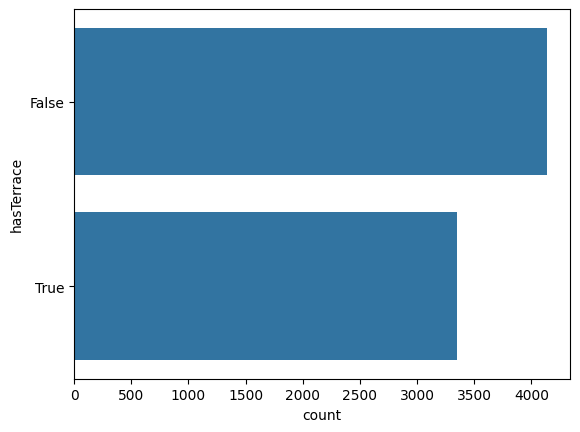

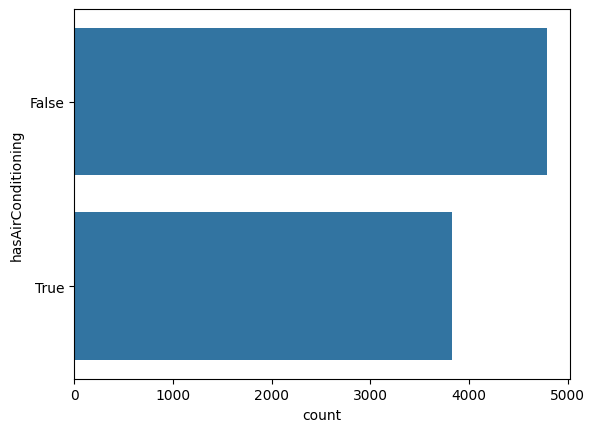

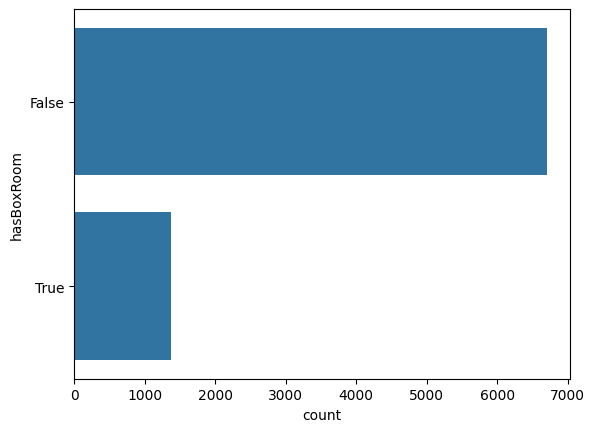

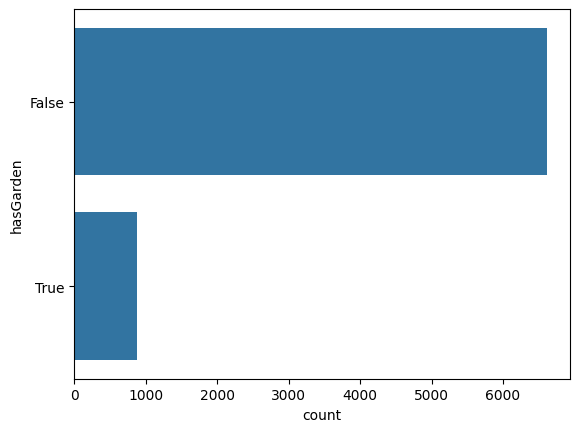

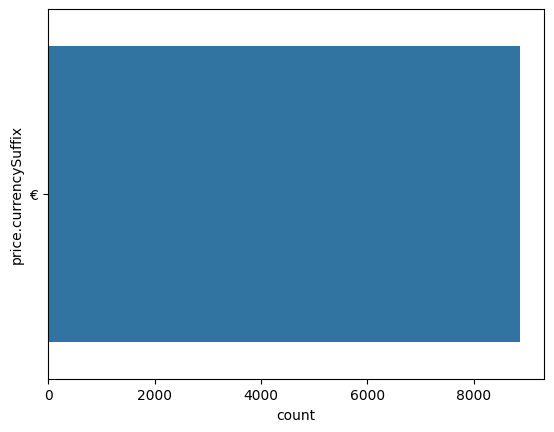

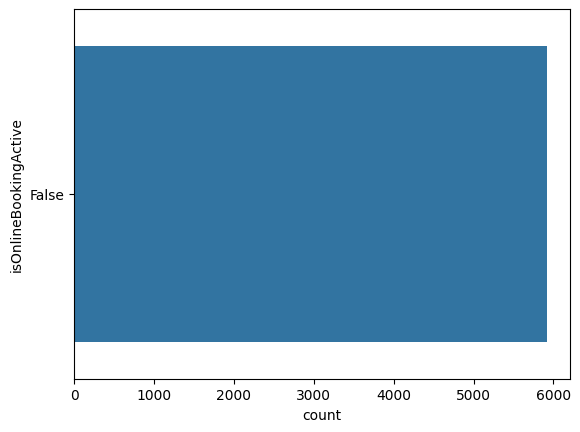

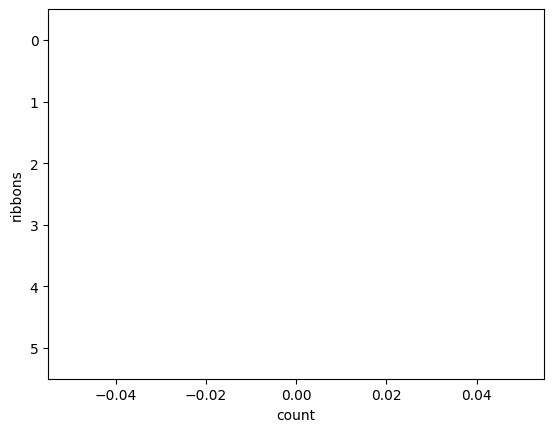

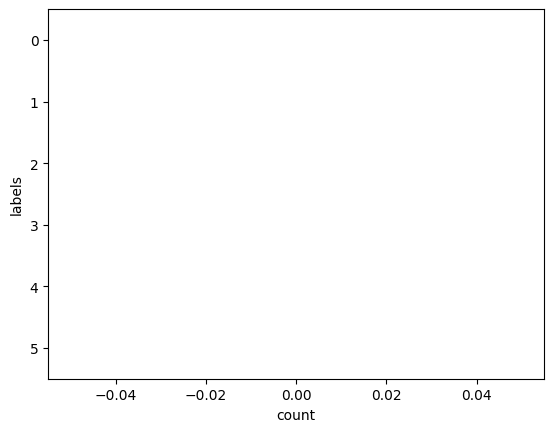

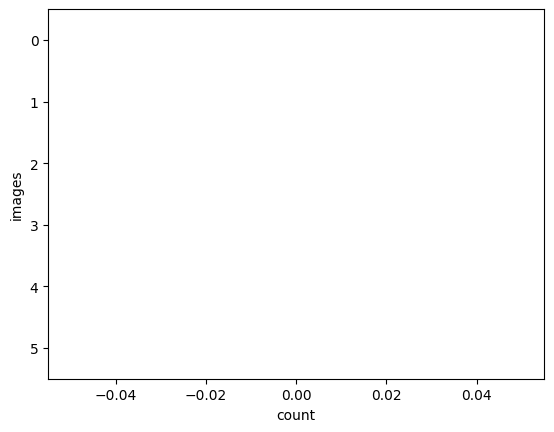

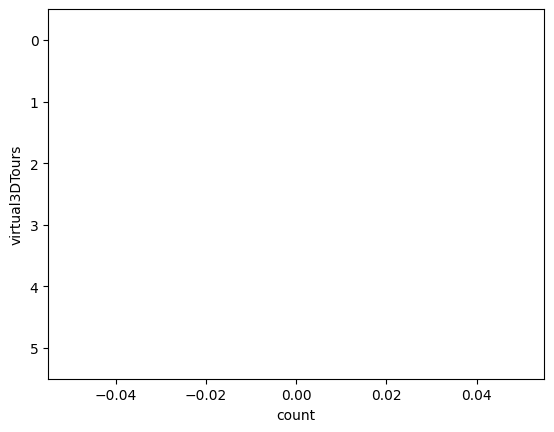

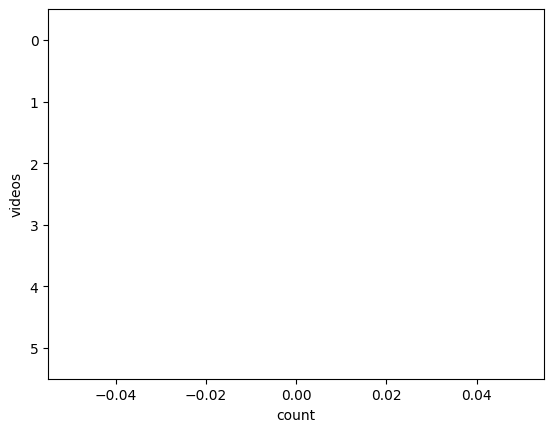

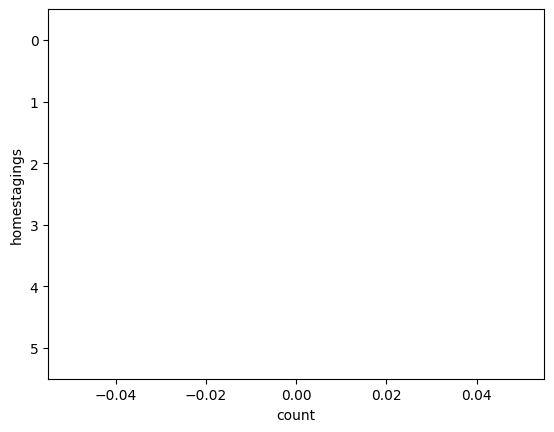

In [ ]:
# Crea un grafico para cada columna con cuantas categorias tiene, siempre y cuando las categorias sean menors de 20.

for col in result_barcelona.select_dtypes(include = "object"):

    if result_barcelona[col].nunique() <= 20:
        plt.figure()
        sns.countplot(y=col, data = result_barcelona)
        plt.show()

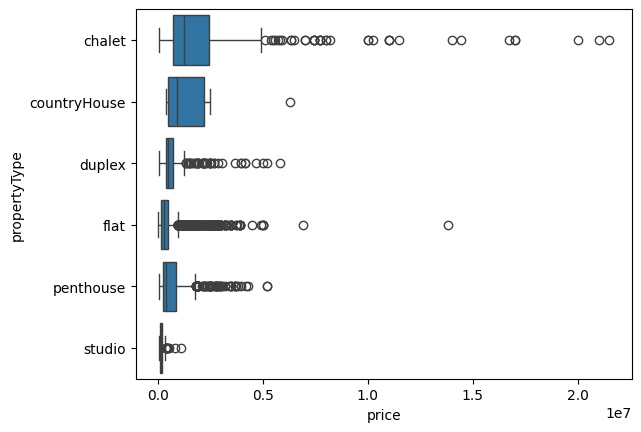

propertyType,chalet,countryHouse,duplex,flat,penthouse,studio
bathrooms,,,,,,
0,0.01,0.00,0.00,0.00,0.00,0.02
1,0.11,0.00,0.13,0.62,0.54,0.82
2,0.20,0.33,0.50,0.29,0.29,0.12
3,0.19,0.50,0.29,0.06,0.11,0.01
4,0.17,0.00,0.05,0.02,0.03,0.02
5,0.12,0.00,0.01,0.00,0.00,0.00
6,0.13,0.00,0.01,0.00,0.01,0.00
7,0.04,0.17,0.00,0.00,0.00,0.00
8,0.01,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Box plot del tipo de viviendas y el precio
sns.boxplot(y = result_barcelona['propertyType'].astype("category"), x = 'price' , data = result_barcelona, orient= "h")
plt.show()

pd.crosstab(result_barcelona['propertyType'], result_barcelona['bathrooms'], normalize='index').transpose()

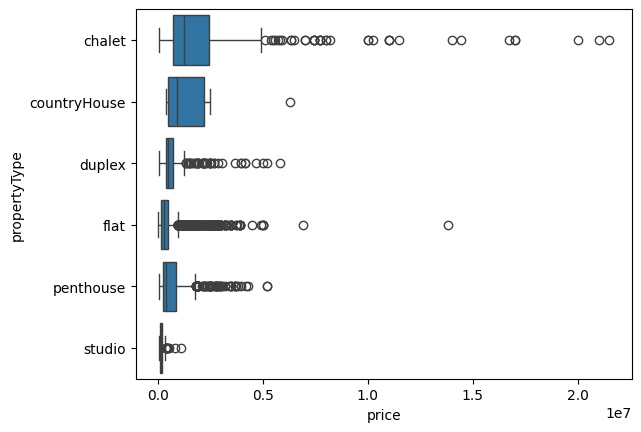

In [ ]:
# Muestra el boxplot de precio en función de la columna "properyType"

sns.boxplot(y = result_barcelona['propertyType'].astype("category"), x = 'price' , data = result_barcelona, orient= "h")
plt.show()

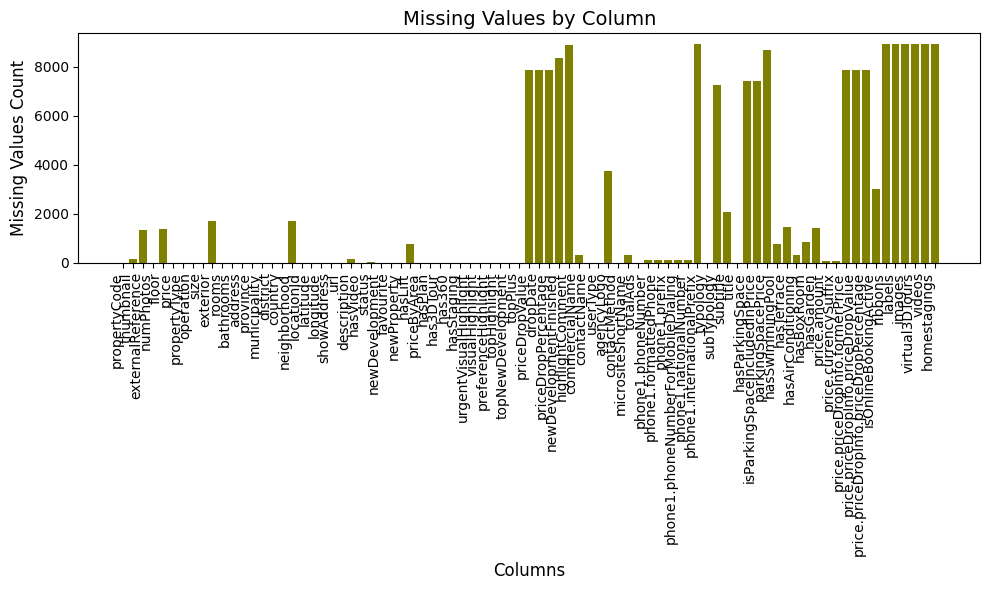

In [ ]:
# Muestra en formato columnas el conteo de los NaN

missing_values = result_barcelona.isna().sum()

missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'MissingCount']

plt.figure(figsize=(10, 6))
plt.bar(missing_values_df['Column'], missing_values_df['MissingCount'], color='olive')

plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Values Count', fontsize=12)
plt.title('Missing Values by Column', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
# Creamos una matriz de correlación con las variables int o float

corr_matrix = result_barcelona.select_dtypes(include=np.number).corr()
corr_matrix

,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,priceDropValue,...,totalAds,phone1.phoneNumber,phone1.prefix,phone1.phoneNumberForMobileDialing,phone1.internationalPrefix,parkingSpacePrice,price.amount,price.priceDropInfo.formerPrice,price.priceDropInfo.priceDropValue,price.priceDropInfo.priceDropPercentage
propertyCode,1.00,-0.02,-0.09,-0.13,-0.07,-0.12,-0.00,0.03,-0.05,-0.09,...,NaN,0.06,0.00,0.01,0.40,0.07,-0.09,-0.08,-0.09,-0.06
numPhotos,-0.02,1.00,0.35,0.39,0.35,0.46,-0.12,-0.11,0.42,0.43,...,NaN,0.05,-0.00,0.00,0.70,0.10,0.35,0.59,0.43,-0.06
price,-0.09,0.35,1.00,0.82,0.50,0.72,-0.11,-0.18,0.57,0.85,...,NaN,0.03,-0.00,0.01,-0.80,0.21,1.00,1.00,0.85,0.03
size,-0.13,0.39,0.82,1.00,0.64,0.78,-0.08,-0.23,0.26,0.80,...,NaN,0.02,-0.00,0.00,-0.40,0.09,0.82,0.88,0.80,0.04
rooms,-0.07,0.35,0.50,0.64,1.00,0.62,-0.07,-0.20,0.13,0.39,...,NaN,0.02,0.00,0.00,-0.43,0.02,0.50,0.46,0.40,-0.08
bathrooms,-0.12,0.46,0.72,0.78,0.62,1.00,-0.13,-0.23,0.41,0.66,...,NaN,0.03,-0.01,0.01,-0.82,0.08,0.72,0.78,0.66,0.02
latitude,-0.00,-0.12,-0.11,-0.08,-0.07,-0.13,1.00,0.73,-0.22,-0.07,...,NaN,-0.02,-0.01,-0.00,-1.00,-0.13,-0.11,-0.10,-0.07,0.02
longitude,0.03,-0.11,-0.18,-0.23,-0.20,-0.23,0.73,1.00,-0.10,-0.10,...,NaN,-0.01,-0.01,0.00,-0.94,-0.12,-0.18,-0.11,-0.10,0.00
priceByArea,-0.05,0.42,0.57,0.26,0.13,0.41,-0.22,-0.10,1.00,0.46,...,NaN,0.04,-0.00,0.02,-0.98,0.27,0.56,0.65,0.46,-0.04
priceDropValue,-0.09,0.43,0.85,0.80,0.39,0.66,-0.07,-0.10,0.46,1.00,...,NaN,0.05,-0.01,0.01,NaN,0.27,0.85,0.87,1.00,0.34


In [ ]:
result_barcelona.columns

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'locationId', 'latitude', 'longitude',
       'showAddress', 'url', 'description', 'hasVideo', 'status',
       'newDevelopment', 'favourite', 'newProperty', 'hasLift', 'priceByArea',
       'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'urgentVisualHighlight',
       'visualHighlight', 'preferenceHighlight', 'topHighlight',
       'topNewDevelopment', 'topPlus', 'priceDropValue', 'dropDate',
       'priceDropPercentage', 'newDevelopmentFinished', 'highlightComment',
       'commercialName', 'contactName', 'userType', 'agencyLogo',
       'contactMethod', 'micrositeShortName', 'totalAds', 'phone1.phoneNumber',
       'phone1.formattedPhone', 'phone1.prefix',
       'phone1.phoneNumberForMobileDialing', 'phone1.nationalNumber',
   

In [ ]:
columns_interes = ["floor",
"rooms",
"bathrooms",
"municipality",
"district",
"neighborhood",
"hasLift",
"priceDropValue",
"subTypology",
"hasParkingSpace",
"hasParkingSpace",
"parkingSpacePrice",
"hasBoxRoom",
"hasBoxRoom",
"hasGarden",
"hasGarden"
]

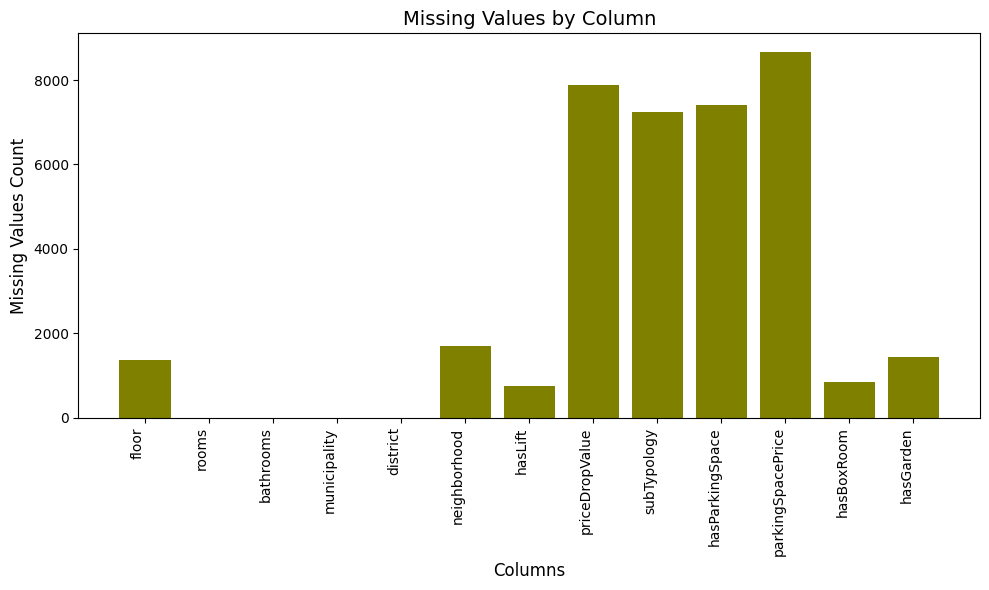

In [ ]:
# Muestra en formato columnas el conteo de los NaN

missing_values = result_barcelona[columns_interes].isna().sum()

missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'MissingCount']

plt.figure(figsize=(10, 6))
plt.bar(missing_values_df['Column'], missing_values_df['MissingCount'], color='olive')

plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Values Count', fontsize=12)
plt.title('Missing Values by Column', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

In [ ]:

variables_numericas = ['price',
 'size',
 'rooms',
 'bathrooms']

In [ ]:
result_barcelona['dropDate'] = pd.to_datetime(result_barcelona['dropDate'])


In [ ]:
# Buscamos si en la descripción alguno tiene parking, si lo tiene asignamos a True la columna hasparkingspace
# De lo contrario asignamos False

result_barcelona['description'].fillna('No description', inplace = True)

result_barcelona.loc[
    (result_barcelona['description'].str.contains('parking', case=False, na=False)) &
    (result_barcelona['hasParkingSpace'].isna()),
    'hasParkingSpace'
] = True

result_barcelona.loc[
    (result_barcelona['description'].str.contains('garaje', case=False, na=False)) &
    (result_barcelona['hasParkingSpace'].isna()),
    'hasParkingSpace'
] = True

result_barcelona.loc[
    (result_barcelona['description'].str.contains('aparcami', case=False, na=False)) &
    (result_barcelona['hasParkingSpace'].isna()),
    'hasParkingSpace'
] = True

result_barcelona.loc[result_barcelona['parkingSpacePrice'].isna(), 'hasParkingSpace'] = False

/tmp/ipykernel_41441/4222876420.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_barcelona['description'].fillna('No description', inplace = True)


In [ ]:
result_barcelona.loc[
    (result_barcelona['description'].str.contains('Air conditioning', case=False, na=False)) &
    (result_barcelona['hasAirConditioning'].isna()),
    'hasAirConditioning'
] = True

result_barcelona.loc[
    (result_barcelona['description'].str.contains('aire acondicionado', case=False, na=False)) &
    (result_barcelona['hasAirConditioning'].isna()),
    'hasAirConditioning'
] = True

result_barcelona.loc[
    (result_barcelona['description'].str.contains('climatización', case=False, na=False)) &
    (result_barcelona['hasAirConditioning'].isna()),
    'hasAirConditioning'
] = True

In [ ]:
result_barcelona.loc[
    (result_barcelona['description'].str.contains('parking inclu', case=False, na=False)) &
    (result_barcelona['isParkingSpaceIncludedInPrice'].isna()),
    'isParkingSpaceIncludedInPrice'
] = True

result_barcelona['isParkingSpaceIncludedInPrice'].fillna('No data', inplace = True)


/tmp/ipykernel_41441/3251214480.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_barcelona['isParkingSpaceIncludedInPrice'].fillna('No data', inplace = True)


In [ ]:
result_barcelona.loc[
    (result_barcelona['description'].str.contains('piscina', case=False, na=False)) &
    (result_barcelona['hasSwimmingPool'].isna()),
    'hasSwimmingPool'
] = True

result_barcelona.loc[
    (result_barcelona['description'].str.contains('swimming', case=False, na=False)) &
    (result_barcelona['hasSwimmingPool'].isna()),
    'hasSwimmingPool'
] = True

result_barcelona['hasSwimmingPool'].fillna('No data', inplace = True)

/tmp/ipykernel_41441/2901649394.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_barcelona['hasSwimmingPool'].fillna('No data', inplace = True)


In [ ]:
result_barcelona.loc[
    (result_barcelona['description'].str.contains('Terrace', case=False, na=False)) &
    (result_barcelona['hasTerrace'].isna()),
    'hasTerrace'
] = True
result_barcelona.loc[
    (result_barcelona['description'].str.contains('terraza', case=False, na=False)) &
    (result_barcelona['hasTerrace'].isna()),
    'hasTerrace'
] = True

result_barcelona['hasTerrace'].fillna('No data', inplace = True)

/tmp/ipykernel_41441/198654888.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_barcelona['hasTerrace'].fillna('No data', inplace = True)


In [ ]:
result_barcelona.loc[
    (result_barcelona['description'].str.contains('garden', case=False, na=False)) &
    (result_barcelona['hasGarden'].isna()),
    'hasGarden'
] = True

result_barcelona.loc[
    (result_barcelona['description'].str.contains('jardín', case=False, na=False)) &
    (result_barcelona['hasGarden'].isna()),
    'hasGarden'
] = True

result_barcelona['hasGarden'].fillna('No data', inplace = True)

/tmp/ipykernel_41441/986332048.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_barcelona['hasGarden'].fillna('No data', inplace = True)


In [ ]:
result_barcelona['hasAirConditioning'].fillna('No data', inplace = True)
result_barcelona['hasBoxRoom'].fillna('No data', inplace = True)

/tmp/ipykernel_41441/517901365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_barcelona['hasAirConditioning'].fillna('No data', inplace = True)
/tmp/ipykernel_41441/517901365.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
result_barcelona.loc[
    (result_barcelona['description'].str.contains('lift', case=False, na=False)) &
    (result_barcelona['hasLift'].isna()),
    'hasLift'
] = True

result_barcelona.loc[
    (result_barcelona['description'].str.contains('ascensor', case=False, na=False)) &
    (result_barcelona['hasLift'].isna()),
    'hasLift'
] = True

result_barcelona['hasLift'].fillna(False, inplace = True)

/tmp/ipykernel_41441/2292506375.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_barcelona['hasLift'].fillna(False, inplace = True)
/tmp/ipykernel_41441/2292506375.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_barcelona['hasLift'].fillna(False, inplace = True)


In [ ]:
result_barcelona['priceDropValue'].fillna('No data', inplace = True)
result_barcelona['dropDate'].fillna('No data', inplace = True)

/tmp/ipykernel_41441/304764778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_barcelona['priceDropValue'].fillna('No data', inplace = True)
/tmp/ipykernel_41441/304764778.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No data' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_barcelona['priceDropValue'].fillna('No data', inplace = True)
/tmp/ipykernel_41441/304764778.py:2: FutureWa

In [ ]:
result_barcelona['contactName'].isna().sum()
result_barcelona['contactName'].unique()

array(['Piso Capital', 'departamento comercial', 'Tatiana', ...,
       'Fincas-miranda.com', 'Valdor', 'Gallofre Guzman Administracio SL'],
      dtype=object)

In [ ]:
result_barcelona.loc[result_barcelona['commercialName'].isna(), 'commercialName'] = result_barcelona['contactName']

In [ ]:
result_barcelona.loc[result_barcelona['typology'].isna(), 'typology'] = result_barcelona['propertyType']
result_barcelona.loc[result_barcelona['subTypology'].isna(), 'subTypology'] = result_barcelona['propertyType']

In [ ]:
result_barcelona.loc[result_barcelona['subtitle'].isna(), 'subtitle'] = result_barcelona['district']
result_barcelona.loc[result_barcelona['title'].isna(), 'title'] = result_barcelona['district']

In [ ]:
result_barcelona.drop(columns = 'micrositeShortName', inplace = True)

In [ ]:
result_barcelona.drop(columns = 'totalAds', inplace = True)

In [ ]:
result_barcelona['thumbnail'].fillna('No pictures', inplace = True)
result_barcelona['externalReference'].fillna('No data', inplace = True)
result_barcelona['floor'].fillna('No data', inplace = True)
result_barcelona['exterior'].fillna('False', inplace = True)
result_barcelona['status'].fillna('No data', inplace = True)
result_barcelona['priceDropPercentage'].fillna(0, inplace = True)
result_barcelona['priceDropPercentage'].fillna('No data', inplace = True)
result_barcelona['contactName'].fillna('No data', inplace = True)
result_barcelona['phone1.phoneNumber'].fillna(0, inplace = True)
result_barcelona['parkingSpacePrice'].fillna(0, inplace = True)
result_barcelona['userType'].fillna('No data', inplace = True)

/tmp/ipykernel_41441/3528944502.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_barcelona['thumbnail'].fillna('No pictures', inplace = True)
/tmp/ipykernel_41441/3528944502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
result_barcelona['log_price'] = np.log(result_barcelona['price'])

<Axes: xlabel='bathrooms', ylabel='propertyType'>

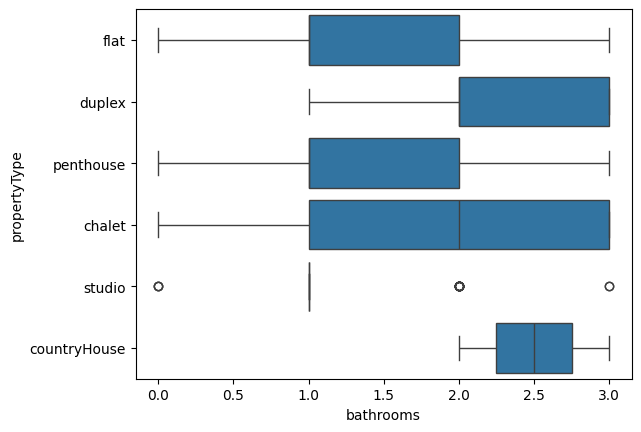

In [ ]:
sns.boxplot(y = result_barcelona['propertyType'], x = 'bathrooms' , data = result_barcelona, orient= "h")

<Axes: xlabel='rooms', ylabel='propertyType'>

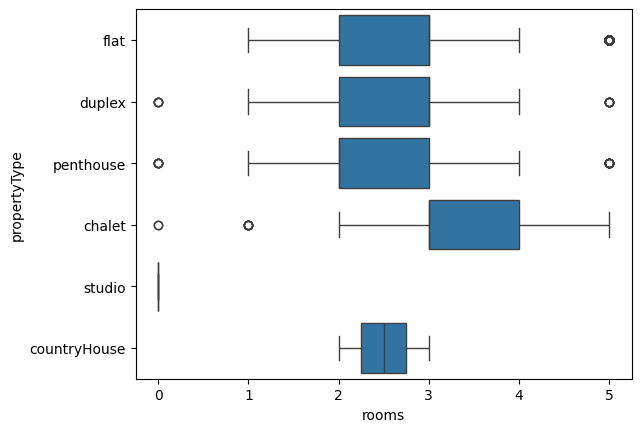

In [ ]:
sns.boxplot(y = result_barcelona['propertyType'], x = 'rooms' , data = result_barcelona, orient= "h")

In [ ]:
result_barcelona = result_barcelona[result_barcelona['rooms'] < result_barcelona['rooms'].quantile(0.99)]

In [ ]:
result_barcelona.shape

(8182, 82)

In [ ]:
result_barcelona = result_barcelona[result_barcelona['size'] < result_barcelona['size'].quantile(0.991)]
result_barcelona = result_barcelona[result_barcelona['bathrooms'] < result_barcelona['bathrooms'].quantile(0.99)]

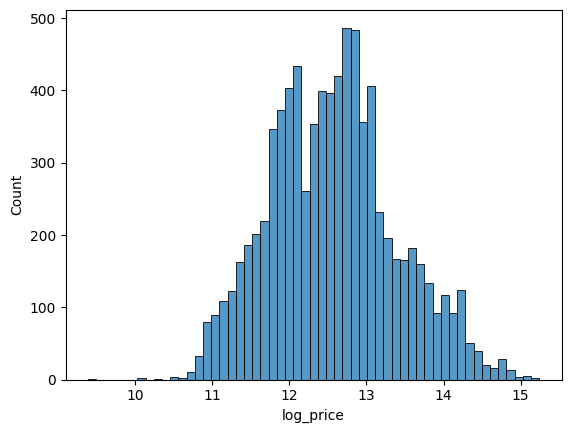

In [ ]:
sns.histplot(result_barcelona['log_price'], kde=False)
plt.show()

<Axes: xlabel='size', ylabel='propertyType'>

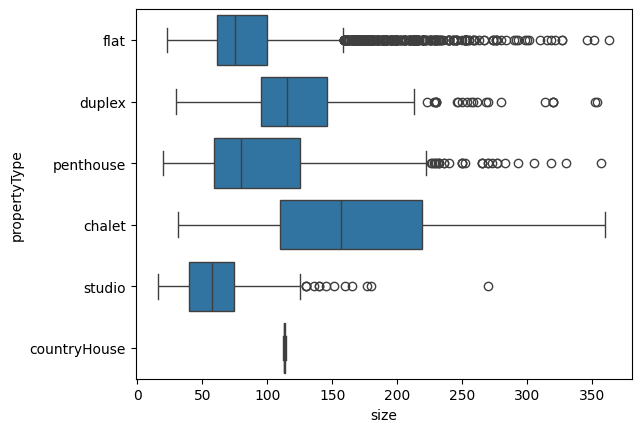

In [ ]:
sns.boxplot(y = result_barcelona['propertyType'], x = 'size' , data = result_barcelona, orient= "h")

In [ ]:
result_barcelona.to_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/barcelona_api_clean.csv', sep = ";", index = False)